# Please type your student ID: 109502562

# HW3-1: Simple Linear Regression

In [236]:
#Import data analysis Library
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# Visualization Library
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Machine Learning Library
import sklearn
from sklearn import linear_model

# Three digits after decimal point
%precision 3

'%.3f'

In [237]:
# Getting data set
student_data = DataFrame(pd.read_csv("student-por.csv", sep=';'))
student_data_set = student_data.loc[:, ["absences"]].values
student_label_set = student_data.loc[:, ["G3"]].values

Regression Cofficient: [[-0.064]]
Intercept: 12.138800862687443
Cofficient of Determination: 0.008350131955637385


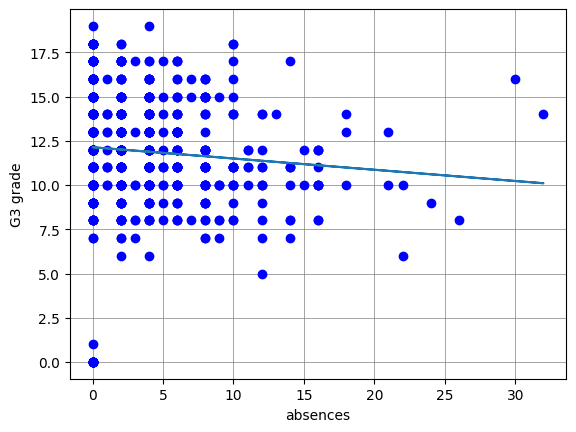

In [238]:
# Training Model
reg_model = linear_model.LinearRegression()
reg_model.fit(student_data_set, student_label_set)
# Show training result
print("Regression Cofficient: {}".format(reg_model.coef_))
print("Intercept: {}".format(reg_model.intercept_[0]))
print("Cofficient of Determination: {}".format(reg_model.score(student_data_set, student_label_set)))
# Drawing graph
plt.xlabel("absences")
plt.ylabel("G3 grade")
plt.grid(True, linestyle="-", color="gray", linewidth="0.5", axis="both")
plt.plot(student_data_set, student_label_set, 'o', color="blue")
plt.plot(student_data_set, reg_model.coef_*student_data_set+reg_model.intercept_[0])

# HW3-2: Mutiple Linear Regression

In [239]:
import requests, zipfile
import io

# Read car selling data
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
url_quest = requests.get(target_url).content

# Make the data be DataFrame
auto_data = pd.read_csv(io.StringIO(url_quest.decode("utf-8")), header=None)

# Set tages in the data column
auto_data.columns =["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", 
                    "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", 
                    "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", 
                    "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

In [240]:
print('Dimension of Data:{}'.format(auto_data.shape))

Dimension of Data:(205, 26)


In [241]:
# Show the first 5 rows
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [242]:
# Count the number of “?” in the dataframe.
auto_data = auto_data[["price", "engine-size", "width"]]
auto_data.isin(['?']).sum()

price          4
engine-size    0
width          0
dtype: int64

In [243]:
# Replace “?” to NaN and delete the row.
auto_data = auto_data.replace('?', np.nan).dropna()

In [244]:
print('Data Type（Before Change）\n{}\n'.format(auto_data.dtypes))

Data Type（Before Change）
price           object
engine-size      int64
width          float64
dtype: object



In [245]:
# Data Type Change
auto_data = auto_data.assign(price=pd.to_numeric(auto_data.price))
print("Data Type（After Change）\n{}".format(auto_data.dtypes))

Data Type（After Change）
price            int64
engine-size      int64
width          float64
dtype: object


In [246]:
# Observe the Correlation
auto_data.corr()

,price,engine-size,width
price,1.000000,0.872335,0.751265
engine-size,0.872335,1.000000,0.729436
width,0.751265,0.729436,1.000000


In [247]:
# Import Data Split Library
from sklearn.model_selection import train_test_split

# Import Linear Regression Model
from sklearn.linear_model import LinearRegression

# Specify target variable as price. Other variables are explanatory variables.
auto_data_set = auto_data.drop("price", axis=1)
auto_label_set = auto_data["price"]

# Split trainset and testset
auto_train_data, auto_test_data, auto_train_label, auto_test_label = train_test_split(auto_data_set, auto_label_set, test_size=0.5, random_state=0)

# Initialize Multiple Linear Regression Model and Train Model
mReg_model = LinearRegression()
mReg_model.fit(auto_train_data, auto_train_label)

# Print Coefficient of Determination
print("Coefficient of Determination (train): {:.3f}".format(mReg_model.score(auto_train_data, auto_train_label))) 
print("Coefficient of Determination (test): {:.3f}\n".format(mReg_model.score(auto_test_data, auto_test_label)))

# Regression Coefficient and Intercept
print("Regression Coefficient\n{}\n".format(pd.Series(mReg_model.coef_, index=auto_data_set.columns)))
print("Intercept: {:.3f}".format(mReg_model.intercept_))

Coefficient of Determination (train): 0.783
Coefficient of Determination (test): 0.778

Regression Coefficient
engine-size     109.526787
width          1261.735518
dtype: float64

Intercept: -84060.643
